<h1> Project 2 - Ames Housing Data and Kaggle Challenge</h1>



Problem Statement: We are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale. <br>

<a class="anchor" id="title"></a>
<b> Table of Contents: </b>

[1.Importing Libraries](#first-section) <br>
[2.Reading/Displaying and Data Cleaning](#second-section)<br>
[3.Exploratory Data Analysis](#third-section)<br>
[4.Scatter Plotting](#fourth-section)<br>
[5.Modelling](#fifth-section)<br>
&emsp; [MLR with 1 predictor](#sixth-section) <br>
&emsp; [MLR with 5 predictor](#seventh-section) <br>
&emsp; [MLR with 10 predictor](#eighth-section) <br>
&emsp; [Ridge/Lasso Regression](#ninth-section) <br>
[6.Submission](#tenth-section)<br>

<a class="anchor" id="first-section"></a>

<b> 1. Importing the neccessary libraries needed: </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

[Return to Table of Contents](#title)

<a class="anchor" id="second-section"></a>

<b> 2. Reading and displaying data, Data Cleaning</b>

Loading csv files into DataFrames:

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

Displaying first 5 rows of data to see that data has been loaded in:

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


Drop `PID` once we've loaded the csv into a `DataFrame`.

In [5]:
train.drop("PID", axis = 1, inplace = True)
test.drop("PID", axis = 1, inplace = True)

Renaming all columns into something more readable and easy for data analysis:

In [6]:
train.columns = [x.lower().replace(' ','_') for x in train.columns]
test.columns = [x.lower().replace(' ','_') for x in test.columns]

Addressing NaN values in our data set:

In [7]:
train.isna().sum().sort_values(ascending=False)

pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_qual         114
garage_finish       114
garage_cond         114
garage_yr_blt       114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmt_cond            55
bsmt_qual            55
bsmtfin_type_1       55
mas_vnr_type         22
mas_vnr_area         22
bsmt_half_bath        2
bsmt_full_bath        2
garage_cars           1
garage_area           1
total_bsmt_sf         1
bsmt_unf_sf           1
bsmtfin_sf_2          1
bsmtfin_sf_1          1
year_built            0
exterior_2nd          0
exterior_1st          0
roof_matl             0
roof_style            0
year_remod/add        0
saleprice             0
condition_1           0
overall_cond          0
utilities             0
ms_subclass           0
ms_zoning             0
lot_area              0
street                0
lot_shape             0
land_contour    

In [8]:
train.dtypes

id                   int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
bsmtfin_sf_2       float64
b

<h3> 2. Handling of null values </h3>

If column is an ordinal, replace NaN with 'None', if it is continuous, replace NaN with 0:

In [9]:
for i in train.columns:
    if train[i].dtype == np.object:
          train[i].fillna('None',inplace=True)
    else:
          train[i].fillna(0,inplace=True)
            
for i in test.columns:
    if test[i].dtype == np.object:
          test[i].fillna('None',inplace=True)
    else:
          test[i].fillna(0,inplace=True)

Check if all null values are accounted for:

In [10]:
train.isna().sum().sort_values(ascending=False)

saleprice          0
sale_type          0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
year_remod/add     0
year_built         0
overall_cond       0
land_contour       0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
utilities          0
overall_qual       0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
total_bsmt_sf      0
heating            0
heating_qc         0
3ssn_porch         0
garage_area        0
garage_qual        0
garage_cond        0
paved_drive        0
wood_deck_sf 

In [11]:
test.isna().sum().sort_values(ascending=False)

sale_type          0
exter_cond         0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
foundation         0
year_built         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
year_remod/add     0
overall_cond       0
total_bsmt_sf      0
land_contour       0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
utilities          0
overall_qual       0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
bsmt_unf_sf        0
heating            0
yr_sold            0
enclosed_porch     0
garage_cars        0
garage_area        0
garage_qual        0
garage_cond        0
paved_drive        0
wood_deck_sf 

[Return to Table of Contents](#title)

<a class="anchor" id="third-section"></a>

### <span style="color:blue"> 3. Exploratory Data Analysis</span>

Calling on pandas Describe function to show us some information about the sale prices in our data set:

In [12]:
train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

We can see from above that the mean of the sale prices of houses here are about USD 180k and bulk of our houses in this data lies between roughly USD130k and 215k. However, we can furthur plot out the histogram of the sale prices of houses to see it's distribution and check for it's skew.

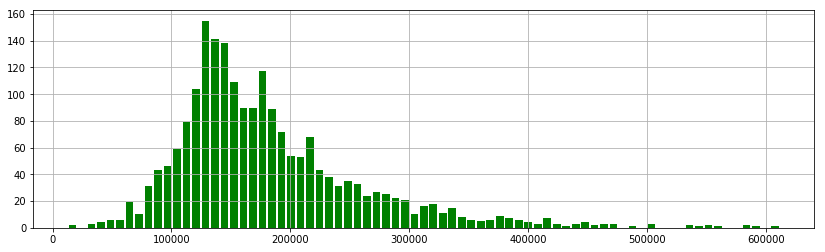

In [13]:
train['saleprice'].hist(bins=75, rwidth=.8, figsize=(14,4), color='green')

From the histogram above, we can see that our data is positively skewed to the right and we can furthur check this out by calculating it's skewness.

Skew is: 1.5575514385863427


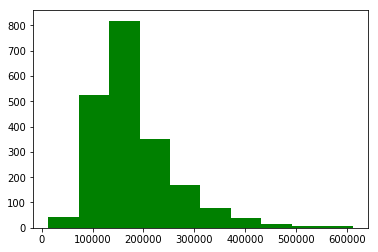

In [14]:
print ("Skew is:", train['saleprice'].skew())
plt.hist(train['saleprice'], color='green')
plt.show()

From above, we can see that Sale Price is not linear and does not follow a normal distribution. We will have to transform it so that it represents a normal distribution. <br> 

Log transformation works fine with positive skewness thus here, we use np.log() to transform train['saleprice'] and calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data.

Skew is: -0.14681576272177396


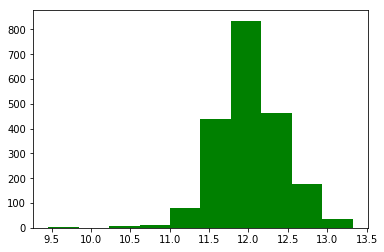

In [15]:
target = np.log(train['saleprice'])
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

As such, we can see that we have improved the skewness of the data and visually it looks more normally distributed.

There are 37 numeric columns that are given to us, however, there are a lot of other columns which are in ordinal form which might have correlation with Sale Price thus here, we used the Find-And-Replace technique to re-assign(encode) all our data to a number to facilitate machine learning. 

In [16]:
cleanup_nums = {"lot_shape": {"Reg": 1, "IR1": 2,'IR2': 3, 'IR3': 4, 'None': 0},
                "utilities": {"AllPub": 1, 'NoSeWa': 2, 'NoSewr': 3, 'None': 0},
                "land_slope": {'Gtl': 1, 'Mod': 2, 'Sev': 3, 'None': 0},
                "exter_qual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "exter_cond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "bsmt_qual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "bsmt_cond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "bsmt_exposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, 'None': 0},
                "bsmtfin_type_1": {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'UnF': 1, 'None': 0},
                "bsmtfin_type_2": {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'UnF': 1, 'None': 0},
                "heating_qc": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "electrical": {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, 'None': 0},
                "kitchen_qual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "functional": {"Typ": 8, "Min1": 7, "Min2": 6, "Mod": 5, "Maj1": 4, "Maj2": 3, "Sev": 2, "Sal": 1, 'None': 0},
                "fireplace_qu": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "garage_finish": {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
                "garage_qual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "garage_cond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, 'Po': 1, 'None': 0},
                "paved_drive": {'Y': 3, 'P': 2 , 'N': 1, 'None': 0},
                "pool_qc" : {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, 'None': 0},
                "fence": {'GdPrv': 4, "MnPrv": 3, 'GdWo': 2, "MnWw": 1, 'None': 0}}
                

In [17]:
train.replace(cleanup_nums, inplace=True)
test.replace(cleanup_nums, inplace=True)

Now, we check that the data has been replaced and the columns which we want encoded has been encoded properly.

In [18]:
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,0.0,13517,Pave,None,2,Lvl,1,CulDSac,1,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,Unf,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,None,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,None,2,Lvl,1,CulDSac,1,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,Unf,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,None,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,None,1,Lvl,1,Inside,1,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,Unf,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,None,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,None,1,Lvl,1,Inside,1,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,None,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,None,2,Lvl,1,Inside,1,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,None,0,3,2010,WD,138500


In [19]:
test.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,190,RM,69.0,9142,Pave,Grvl,1,Lvl,1,Inside,1,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,Unf,0,Unf,0,1020,1020,GasA,4,N,2,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,1,1,440,1,1,3,0,60,112,0,0,0,0,0,None,0,4,2006,WD
1,2718,90,RL,0.0,9662,Pave,None,2,Lvl,1,Inside,1,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,Unf,0,Unf,0,1967,1967,GasA,3,Y,5,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,3,2,580,3,3,3,170,0,0,0,0,0,0,0,None,0,8,2006,WD
2,2414,60,RL,58.0,17104,Pave,None,2,Lvl,1,Inside,1,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,6,554,Unf,0,100,654,GasA,5,Y,5,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,2,2,426,3,3,3,100,24,0,0,0,0,0,0,None,0,9,2006,New
3,1989,30,RM,60.0,8520,Pave,None,1,Lvl,1,Inside,1,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,Unf,0,Unf,0,968,968,GasA,3,Y,5,968,0,0,968,0,0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,1,2,480,2,3,1,0,0,184,0,0,0,0,0,None,0,7,2007,WD
4,625,20,RL,0.0,9500,Pave,None,2,Lvl,1,Inside,1,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4,609,Unf,0,785,1394,GasA,4,Y,5,1394,0,0,1394,1,0,1,1,3,1,3,6,8,2,4,Attchd,1963.0,2,2,514,3,3,3,0,76,0,0,185,0,0,0,None,0,7,2009,WD


However, we also have to account for the rest of our nominal columns to check for collinearity with our Sale Price thus, we use Pandas get_dummies function to encode our nominal columns.

In [20]:
features_train_cat = [i for i in train.columns if (i != 'saleprice') and (train[i].dtypes) == np.object]
features_test_cat = [i for i in test.columns if (i != 'saleprice') and (test[i].dtypes) == np.object]

In [21]:
train = pd.get_dummies(train, columns=features_train_cat, drop_first=True)
test = pd.get_dummies(test, columns=features_test_cat, drop_first=True)

In [22]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.shape

(2051, 232)

In [23]:
train.dtypes

id                        int64
ms_subclass               int64
lot_frontage            float64
lot_area                  int64
overall_qual              int64
overall_cond              int64
year_built                int64
year_remod/add            int64
mas_vnr_area            float64
bsmt_qual                 int64
bsmt_cond                 int64
bsmt_exposure             int64
bsmtfin_sf_1            float64
bsmtfin_sf_2            float64
bsmt_unf_sf             float64
total_bsmt_sf           float64
1st_flr_sf                int64
2nd_flr_sf                int64
low_qual_fin_sf           int64
gr_liv_area               int64
bsmt_full_bath          float64
bsmt_half_bath          float64
full_bath                 int64
half_bath                 int64
bedroom_abvgr             int64
kitchen_abvgr             int64
totrms_abvgrd             int64
fireplaces                int64
fireplace_qu              int64
garage_yr_blt           float64
garage_finish             int64
garage_c

We can see that now all our columns which encoded and can be recognised and used for modelling and we can now hearby check for collinearity with respect to what we are trying to predict here, Sale Price. <br>

Here below, we view the first 15 most positively correlated values with respect to our Sale Price and also, the 5 most negatively correlated values at the same time.

In [24]:
corr = numeric_features.corr()
print (corr['saleprice'].sort_values(ascending=False)[:15], '\n')
print (corr['saleprice'].sort_values(ascending=False)[-5:])

saleprice           1.000000
overall_qual        0.800207
gr_liv_area         0.697038
garage_area         0.649897
garage_cars         0.647781
total_bsmt_sf       0.629303
1st_flr_sf          0.618486
bsmt_qual           0.612188
year_built          0.571849
garage_finish       0.557839
kitchen_qual_5      0.551284
year_remod/add      0.550370
fireplace_qu        0.538925
full_bath           0.537969
foundation_PConc    0.529047
Name: saleprice, dtype: float64 

foundation_CBlock    -0.355535
garage_type_Detchd   -0.370344
mas_vnr_type_None    -0.411170
kitchen_qual_3       -0.540860
exter_qual_3         -0.600362
Name: saleprice, dtype: float64


Since we have so many predictor columns, we can take a few of the more positively correlated predictors and plot a heatmap to help us visually understand it's collinearity. We can take the top most correlated columns and plot a heatmap.

In [25]:
most_corr = train[['saleprice',
                  'overall_qual',
                  'gr_liv_area',
                  'garage_area',
                  'total_bsmt_sf',
                  'bsmt_qual',
                  'year_built',
                  'garage_finish',
                  'year_remod/add',
                  'fireplace_qu',
                  'full_bath']]

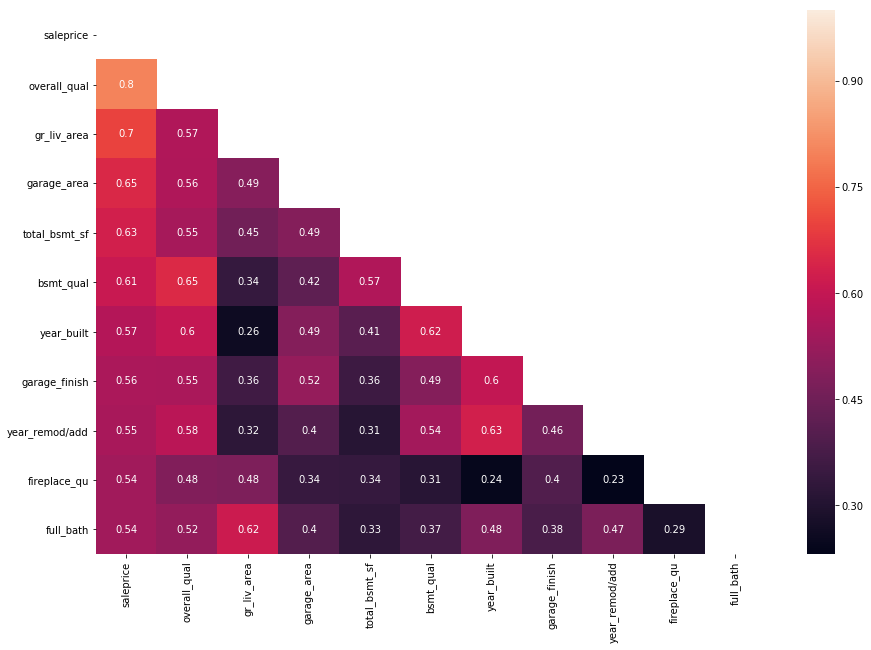

In [26]:
fig, ax = plt.subplots(figsize=(15,10)) 
corr = most_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, mask=mask)

We can also create histograms of all the columns above to check for their distribution.

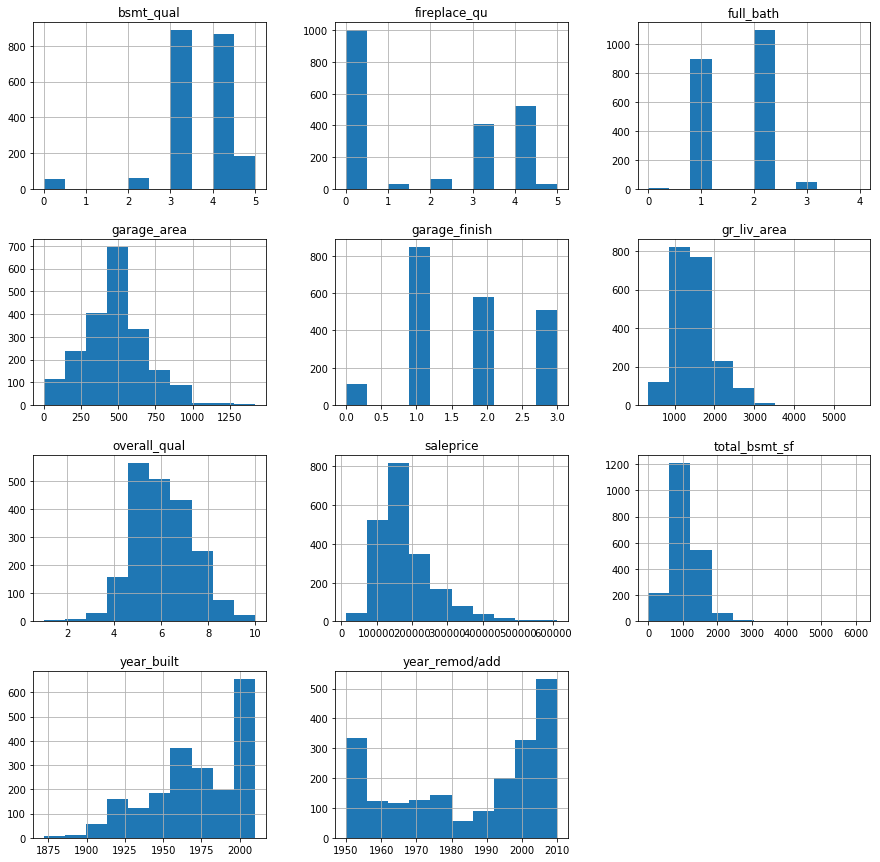

In [27]:
most_corr.hist(figsize=(15, 15));

Some features can we drawn from all the histograms above. One clear feature we can see from the histograms above is that, the price of the house increases with the year which it is built. Histograms are important for us to see how the data is distributed for every variable. <br>

Furthur exploratory data analysis can be done as we take some of the most correlated columns and plot their scatter plots out.

[Return to Table of Contents](#title)

<a class="anchor" id="fourth-section"></a>

<h3> 4. Scatter Plotting </h3>

<b> Scatter plot of Overall Quality against Sale Price <b>

First, we remove some outliers from these columns which we will be looking into more.

In [28]:
train = train[train['saleprice'] > 95000]

In [29]:
train = train[train['gr_liv_area'] < 3000]

In [30]:
train = train[train['garage_area'] < 1000]

In [31]:
train = train[train['total_bsmt_sf'] < 2300]

In [32]:
target = np.log(train['saleprice'])

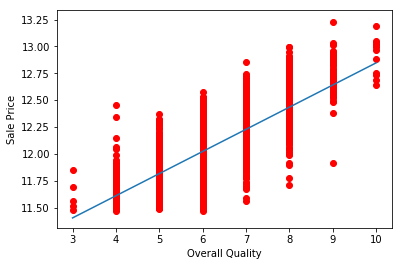

In [33]:
plt.scatter(x=train['overall_qual'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality')
plt.plot(np.unique(train['overall_qual']), np.poly1d(np.polyfit(train['overall_qual'], target, 1))(np.unique(train['overall_qual'])))
plt.show()

<b> Scatter plot of General Living Area against Sale Price <b>

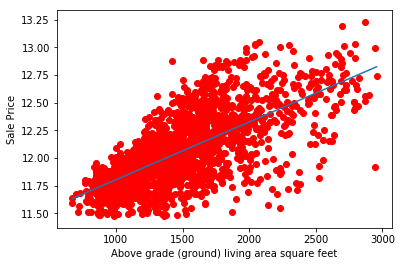

In [34]:
plt.scatter(x=train['gr_liv_area'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.plot(np.unique(train['gr_liv_area']), np.poly1d(np.polyfit(train['gr_liv_area'], target, 1))(np.unique(train['gr_liv_area'])))
plt.show()

<b> Scatter plot of Garage Area against Sale Price <b>

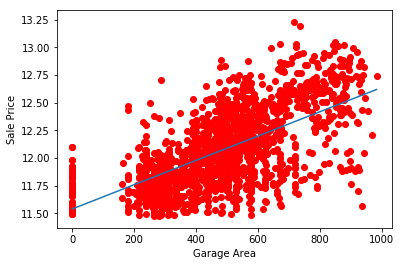

In [35]:
plt.scatter(x=train['garage_area'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.plot(np.unique(train['garage_area']), np.poly1d(np.polyfit(train['garage_area'], target, 1))(np.unique(train['garage_area'])))
plt.show()

<b> Scatter plot of Total Basement Sqft against Sale Price <b>

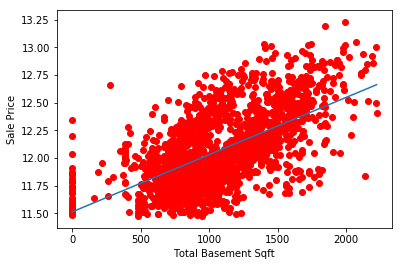

In [36]:
plt.scatter(x=train['total_bsmt_sf'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Total Basement Sqft')
plt.plot(np.unique(train['total_bsmt_sf']), np.poly1d(np.polyfit(train['total_bsmt_sf'], target, 1))(np.unique(train['total_bsmt_sf'])))
plt.show()

<b> Scatter plot of Year Built against Sale Price <b>

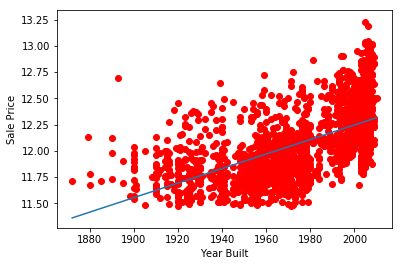

In [37]:
plt.scatter(x=train['year_built'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Year Built')
plt.plot(np.unique(train['year_built']), np.poly1d(np.polyfit(train['year_built'], target, 1))(np.unique(train['year_built'])))
plt.show()

<b> Scatter plot of Garage Finish against Sale Price <b>

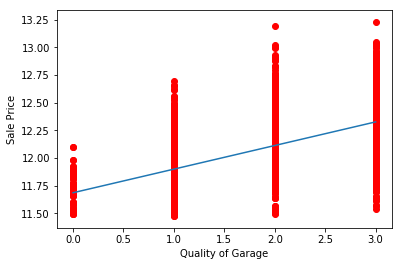

In [38]:
plt.scatter(x=train['garage_finish'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Quality of Garage')
plt.plot(np.unique(train['garage_finish']), np.poly1d(np.polyfit(train['garage_finish'], target, 1))(np.unique(train['garage_finish'])))
plt.show()

<b> Scatter plot of Year Remodelled against Sale Price

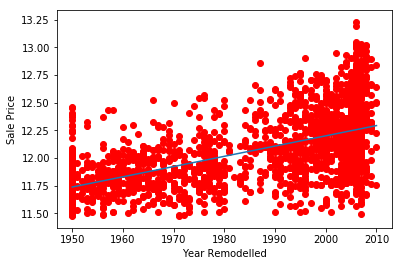

In [39]:
plt.scatter(x=train['year_remod/add'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Year Remodelled')
plt.plot(np.unique(train['year_remod/add']), np.poly1d(np.polyfit(train['year_remod/add'], target, 1))(np.unique(train['year_remod/add'])))
plt.show()

<b> Scatter plot of Fireplace Quality against Sale Price

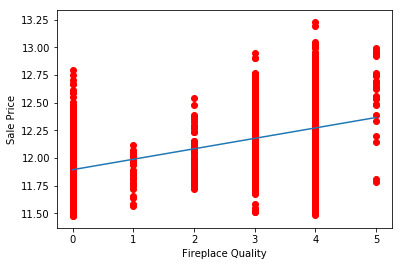

In [40]:
plt.scatter(x=train['fireplace_qu'], y=target,c=['red'])
plt.ylabel('Sale Price')
plt.xlabel('Fireplace Quality')
plt.plot(np.unique(train['fireplace_qu']), np.poly1d(np.polyfit(train['fireplace_qu'], target, 1))(np.unique(train['fireplace_qu'])))
plt.show()

From the scatter plots above, we can see that the outliers which might affect our model later are removed and our data looks better represented now.

[Return to Table of Contents](#title)

<a class="anchor" id="fifth-section"></a>

# 5. Modelling

In this section, we will be running a few regression models to furthur test and find out which model fits this case the most for our predictor set of values!

<a class="anchor" id="sixth-section"></a>


<b> <span style="color:blue">Multiple Linear Regression (MLR) with 1 predictor column </span></b>

Setting up our predictors matrix with the top 1 most correlated and initializing target vector.

In [41]:
X = train[['overall_qual']].values

# Target vector (SalePrice)
target = train['saleprice']
y = target

print(target.shape)
print(X.shape)

(1861,)
(1861, 1)


Our target is a vector that represents a single variable (SalePrice), which has exactly the same number of observations as our training set: 1861. Thus we are good to proceed! </b>

We first do a train-test-split and fit the training data into the Linear Regression Model.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that the model has been fit, we can now evaluate our model. We need two scores to determine if our model is performing well, or experiencing high bias/variance. Thus, here we use .score().

In [43]:
lr.score(X_train, y_train)

0.6318548089543015

In [44]:
lr.score(X_test, y_test)

0.5689749953235402

Then, we proceed to predict our Sale Price with this model.

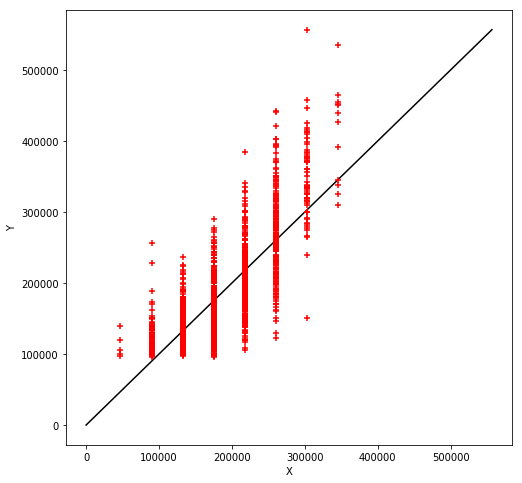

Mean-squared-error:  41853.445556205515
R2 score:  0.6184042997644941


In [45]:
predictions  =  lr.predict(X)
score = lr.score(X,y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y , s=30, c='r', marker='+', zorder=10)
plt.xlabel("X")
plt.ylabel("Y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

print("Mean-squared-error: ", np.sqrt(mean_squared_error(target, predictions)))
print("R2 score: ", score)

We can see from the mean-squared-error and R2 score that this has a quite serious case of underfitting, the accuracy of this model used to predict our Sale Price if we only use Overall Quality of House is very low. 

Let's use more predictors in the next model and see what effect this has on our MLR model.

[Return to Table of Contents](#title)

<a class="anchor" id="seventh-section"></a>


<b><span style="color:blue"> Multiple Linear Regression (MLR) with 5 predictor columns </span></b>

Setting up our predictors matrix with the top 5 most correlated and initializing target vector.

In [46]:
#Predictors
X = train[['overall_qual','gr_liv_area','garage_area','total_bsmt_sf','year_built']].values

# Target vector (SalePrice)
target = train['saleprice']
y = target

print(target.shape)
print(X.shape)

(1861,)
(1861, 5)


Our target is a vector that represents a single variable (SalePrice), which has exactly the same number of observations as our training set: 1861. Thus we are good to proceed! </b>

We do another train-test-split and fit the training data into the Linear Regression Model.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that the model has been fit, we can now evaluate our model. We need two scores to determine if our model is performing well, or experiencing high bias/variance. Thus, here we use .score().

In [48]:
lr.score(X_train, y_train)

0.8089974419935105

In [49]:
lr.score(X_test, y_test)

0.7901458416133452

Then, we proceed to predict our Sale Price with this model.

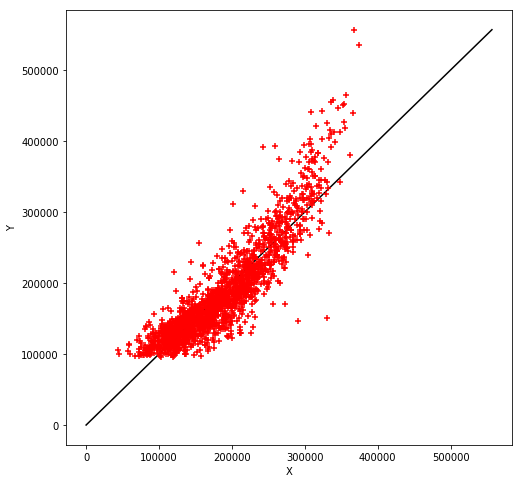

Mean-squared-error:  29921.585947535543
R2 score:  0.8049660319648525


In [50]:
predictions  =  lr.predict(X)
score = lr.score(X,y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y , s=30, c='r', marker='+', zorder=10)
plt.xlabel("X")
plt.ylabel("Y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

print("Mean-squared-error: ", np.sqrt(mean_squared_error(target, predictions)))
print("R2 score: ", score)

Based on the MSE and R2 score compared to the above model, we can see that the inclusion of more predictors improved our model score accordingly and we can start to interpret the coefficients of this MLR model.

In [51]:
print(lr.coef_)

[20563.86972181    52.31390964    43.04431041    38.90145486
   285.30419905]


<b> Intepretation: </b>

For a 1-unit increase in Overall Quality (holding constant the rest), there is a 20563.86972181 increase in SALEPRICE <br>
For a 1-unit increase in General Living Area (holding constant the rest), there is a 52.31390964 increase in SALEPRICE <br>
For a 1-unit increase in Garage Area (holding constant the rest), there is a 43.04431041 increase in SALEPRICE <br>
For a 1-unit increase in Total Basement Sqft (holding constant the rest), there is a 38.90145486 increase in SALEPRICE <br>
For a 1-unit increase in Year Built (holding constant the rest), there is a 285.30419905 increase in SALEPRICE

Cross-Validation-Score:

In [52]:
scores = cross_val_score(lr, X_train, y_train, cv=5).mean()
scores

0.8078019151370258

This value will be used to evaluate the difference between using 5 and 10 predictor columns.

[Return to Table of Contents](#title)

<a class="anchor" id="eighth-section"></a>

<b> <span style="color:blue">Multiple Linear Regression (MLR) with 10 predictor columns </span></b>

In [53]:
#Predictors
X = train[['overall_qual',
              'gr_liv_area',
              'garage_area',
              'total_bsmt_sf',
              'bsmt_qual',
              'year_built',
              'garage_finish',
              'year_remod/add',
              'fireplace_qu',
              'kitchen_qual_5']].values

# Target vector (SalePrice)
target = train['saleprice']
y = target

print(target.shape)
print(X.shape)

(1861,)
(1861, 10)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

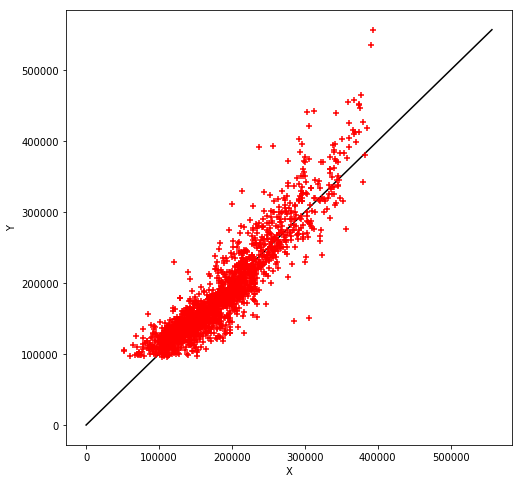

Mean-squared-error:  26906.07414148556
R2 score:  0.8422963634267


In [55]:
lr = linear_model.LinearRegression()

model = lr.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("X")
plt.ylabel("Y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()

print("Mean-squared-error: ", np.sqrt(mean_squared_error(target, predictions)))
print("R2 score: ", score)

In [56]:
print(lr.coef_)

[1.25260707e+04 4.69679721e+01 4.43674440e+01 3.30927424e+01
 4.06961170e+03 1.85614343e+02 2.50405962e+03 2.84645656e+02
 3.23698676e+03 4.43260174e+04]


Cross-Validation-Score:

In [57]:
scores = cross_val_score(lr, X_train, y_train, cv=3).mean()
scores

0.8413433080372817

We can see that our MSE and R2 score has reduced upon the inclusion of more predictors. However, now that we are adding predictors into our model, with more and more predictors we will also run the risk of overfitting our prediction model thus we can implement Ridge and Lasso Regressions to prevent overfitting.

For this case based on the CV Score, 10 predictors seems to do better than 5 predictors and 1 predictor. We will use these 10 predictors for our Ridge and Lasso Regression in the next section.

[Return to Table of Contents](#title)

<a class="anchor" id="ninth-section"></a>

# Ridge and Lasso Regression Models

Hence, we will be using 10 predictors for our Ridge and Lasso Regression and then evaluate them again against our MLR with 10 predictor columns. <br>

### Scaling

Since we are using Ridge and Lasso Regression, we will have to scale our features and we create instances of the Lasso and Ridge models.

In [58]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

Then we evaluate these two models with their CV Score.

In [59]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

C:\Users\kelvi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kelvi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kelvi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8413527442592313

In [60]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8414251449317129

### Ridge Regression Model:

Ridge Regression is used as we can control variance with the alpha parameter which will impose a penalty on the features applied, and thus prevent overfitting compared to MLR which overfitting will occur if we fit too many features into it.

First we fit our training set into the ridge model.

In [61]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

Then we proceed to check our score on both our training and testing set.

In [62]:
ridge.score(X_train, y_train)

0.8448581478164838

In [63]:
ridge.score(X_test, y_test)

0.8317421056850381

In [64]:
ridge_scores.mean()

0.8414251449317129

Finally, we carry out the prediction with Ridge model.

In [65]:
pred = ridge.predict(X_test)

In [66]:
r2_score(y_test, pred)

0.831742105685038

### Lasso Regression Model:

In [67]:
pred.shape

(466,)

First we fit our training set into the lasso model.

In [68]:
lasso.fit(X_train, y_train)

C:\Users\kelvi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

Then we proceed to check our score on both our training and testing set.

In [69]:
lasso.score(X_train, y_train)

0.8448502806256737

In [70]:
lasso.score(X_test, y_test)

0.8314233941556084

In [71]:
lasso_scores.mean()

0.8413527442592313

Finally, we carry out the prediction with lasso model.

In [72]:
pred = lasso.predict(X_test)

In [73]:
r2_score(y_test, pred)

0.8314233941556084

<b> Based on all the evaluation done above, we can see that for our set of predictors, MLR with 10 top predictors seems to be the best performing model thus we will go ahead with using this model to predict our SalePrice for our test data for the Kaggle Challenge. </b>

[Return to Table of Contents](#title)

<a class="anchor" id="tenth-section"></a>

# 6. Submission

We finally trained our model and is ready to make prediction on test set. We will use predict() function imported from Scikit-learn and create a Pandas DataFrame containing the Id and the correspending SalePrice of each house in the test set.

This last step consists of converting the DataFrame into a .csv file and uploading it on Kaggle by clicking "Submit Predictions" and choosing the .csv file.

Using the MLR model with 10 predictors on our test set...

In [74]:
kaggle_upload = model.predict(test[['overall_qual',
              'gr_liv_area',
              'garage_area',
              'total_bsmt_sf',
              'bsmt_qual',
              'year_built',
              'garage_finish',
              'year_remod/add',
              'fireplace_qu',
              'kitchen_qual_5']])

In [75]:
kaggle_upload.shape

(879,)

In [76]:
df = pd.DataFrame(test['id'])

In [77]:
df['saleprice'] = kaggle_upload

In [78]:
df.set_index(keys=['id'], inplace=True)

In [79]:
df.head()

,saleprice
id,
2658,158722.693301
2718,218847.579058
2414,195575.875850
1989,123583.999359
625,186430.856463


Then, we save into a csv file for uploading to Kaggle to retrieve our score!

In [80]:
df.to_csv(r'./datasets/kaggle.csv')

### After uploading to Kaggle, our model returned a Kaggle score of 33415.70894!

[Return to Table of Contents](#title)